In [39]:
# Import all ncecssary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import re
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
# set global parameters

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid', {'grid.color':'red'})
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Data/cos_predict.csv')

In [4]:
df.head()

,cust_id,food_category,food_department,food_family,store_sales,store_cost,unit_sales,promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home,avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,65071346592,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,10064765048,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,62462698215,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,27668406698,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,30621230049,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [5]:
df.shape

(60428, 40)

In [6]:
df.shape

(60428, 40)

In [7]:
df['food_category'].nunique()

45

In [8]:
df = pd.get_dummies(df, prefix=None,columns=['food_category'])
df = pd.get_dummies(df, prefix=None,columns=['food_department'])
df = pd.get_dummies(df, prefix=None,columns=['food_family'])

In [9]:
df = pd.get_dummies(df, prefix=None,columns=['promotion_name'])
df = pd.get_dummies(df, prefix=None,columns=['sales_country'])

In [10]:
df = pd.get_dummies(df, prefix=None,columns=['marital_status'])
df = pd.get_dummies(df, prefix=None,columns=['gender'])

In [11]:
df = pd.get_dummies(df, prefix=None,columns=['education'])
df = pd.get_dummies(df, prefix=None,columns=['member_card'])
df = pd.get_dummies(df, prefix=None,columns=['occupation'])
df = pd.get_dummies(df, prefix=None,columns=['houseowner'])

In [12]:
df = pd.get_dummies(df, prefix=None,columns=['store_type'])
df = pd.get_dummies(df, prefix=None,columns=['store_city'])
df = pd.get_dummies(df, prefix=None,columns=['store_state'])

In [13]:
df = pd.get_dummies(df, prefix=None,columns=['media_type'])

In [14]:
df.shape

(60428, 214)

In [15]:
df.head()

,cust_id,store_sales,store_cost,unit_sales,total_children,avg_cars_at_home,avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,food_category_Baking Goods,food_category_Bathroom Products,food_category_Beer and Wine,food_category_Bread,food_category_Breakfast Foods,food_category_Candles,food_category_Candy,food_category_Canned Anchovies,food_category_Canned Clams,food_category_Canned Oysters,food_category_Canned Sardines,food_category_Canned Shrimp,food_category_Canned Soup,food_category_Canned Tuna,food_category_Carbonated Beverages,food_category_Cleaning Supplies,food_category_Cold Remedies,food_category_Dairy,food_category_Decongestants,food_category_Drinks,food_category_Eggs,food_category_Electrical,food_category_Frozen Desserts,food_category_Frozen Entrees,food_category_Fruit,food_category_Hardware,food_category_Hot Beverages,food_category_Hygiene,food_category_Jams and Jellies,food_category_Kitchen Products,food_category_Magazines,food_category_Meat,food_category_Miscellaneous,food_category_Packaged Vegetables,food_category_Pain Relievers,food_category_Paper Products,food_category_Pizza,food_category_Plastic Products,food_category_Pure Juice Beverages,food_category_Seafood,food_category_Side Dishes,food_category_Snack Foods,food_category_Specialty,food_category_Starchy Foods,food_category_Vegetables,food_department_Alcoholic Beverages,food_department_Baked Goods,food_department_Baking Goods,food_department_Beverages,food_department_Breakfast Foods,food_department_Canned Foods,food_department_Canned Products,food_department_Carousel,food_department_Checkout,food_department_Dairy,food_department_Deli,food_department_Eggs,food_department_Frozen Foods,food_department_Health and Hygiene,food_department_Household,food_department_Meat,food_department_Periodicals,food_department_Produce,food_department_Seafood,food_department_Snack Foods,food_department_Snacks,food_department_Starchy Foods,food_family_Drink,food_family_Food,food_family_Non-Consumable,promotion_name_Bag Stuffers,promotion_name_Best Savings,promotion_name_Big Promo,promotion_name_Big Time Discounts,promotion_name_Big Time Savings,promotion_name_Bye Bye Baby,promotion_name_Cash Register Lottery,promotion_name_Coupon Spectacular,promotion_name_Dimes Off,promotion_name_Dollar Cutters,promotion_name_Dollar Days,promotion_name_Double Down Sale,promotion_name_Double Your Savings,promotion_name_Fantastic Discounts,promotion_name_Free For All,promotion_name_Go For It,promotion_name_Green Light Days,promotion_name_Green Light Special,promotion_name_High Roller Savings,promotion_name_I Cant Believe It Sale,promotion_name_Money Savers,promotion_name_Mystery Sale,promotion_name_One Day Sale,promotion_name_Pick Your Savings,promotion_name_Price Cutters,promotion_name_Price Destroyers,promotion_name_Price Savers,promotion_name_Price Slashers,promotion_name_Price Smashers,promotion_name_Price Winners,promotion_name_Sale Winners,promotion_name_Sales Days,promotion_name_Sales Galore,promotion_name_Save-It Sale,promotion_name_Saving Days,promotion_name_Savings Galore,promotion_name_Shelf Clearing Days,promotion_name_Shelf Emptiers,promotion_name_Super Duper Savers,promotion_name_Super Savers,promotion_name_Super Wallet Savers,promotion_name_Three for One,promotion_name_Tip Top Savings,promotion_name_Two Day Sale,promotion_name_Two for One,promotion_name_Unbeatable Price Savers,promotion_name_Wallet Savers,promotion_name_Weekend Markdown,promotion_name_You Save Days,sales_country_Canada,sales_country_Mexico,sales_country_USA,marital_status_M,marital_status_S,gender_F,gender_M,education_Bachelors Degree,education_Graduate Degree,education_High School Degree,education_Partial College,education_Partial High School,member_card_Bronze,member_card_Golden,member_card_Normal,member_card_Silver,occupation_Clerical,occupat

In [16]:
df.loc[df['avg. yearly_income']=='$150K +','avg. yearly_income'] = '$150K - $150K'

In [17]:
df['avg_yearly_income'] = df['avg. yearly_income'].str.replace('K','')
df['avg_yearly_income'] = df['avg_yearly_income'].str.replace('$','')

In [18]:
df['min_income'] = df['avg_yearly_income'].str.split('-').apply(lambda x: x[0])
df['max_income'] = df['avg_yearly_income'].str.split('-').apply(lambda x: x[1])

In [19]:
df_brandperc = df['brand_name'].value_counts()/df.shape[0]*100
df_brandperc = df_brandperc.reset_index()
df_brandperc = df_brandperc.rename(columns={'index':'brand_name','brand_name':'brand_perc'})

In [20]:
df_brandperc.head()

,brand_name,brand_perc
0,Hermanos,3.043291
1,Ebony,2.861256
2,Tell Tale,2.859602
3,Tri-State,2.702390
4,High Top,2.634540


In [21]:
brand_label0 = df_brandperc.loc[df_brandperc['brand_perc'] < 1]['brand_name']
brand_label1 = df_brandperc.loc[(df_brandperc['brand_perc'] >= 1) &
                                (df_brandperc['brand_perc'] < 2)]['brand_name']
brand_label2 = df_brandperc.loc[(df_brandperc['brand_perc'] >= 2) &
                                (df_brandperc['brand_perc'] < 3)]['brand_name']
brand_label3 = df_brandperc.loc[(df_brandperc['brand_perc'] >= 3) &
                                (df_brandperc['brand_perc'] < 4)]['brand_name']

In [22]:
df = pd.merge(df, df_brandperc,on='brand_name',how='left')

In [23]:
def get_brand_label(x):
    if x < 1:
        return 'brand_0'
    elif x >= 1 and x < 2:
        return 'brand_1'
    elif x >= 2 and x < 3:
        return 'brand_2'
    else:
        return 'brand_3'

In [24]:
df['brand_label'] = df['brand_perc'].apply(lambda x: get_brand_label(x))
df = pd.get_dummies(df, prefix=None,columns=['brand_label'])

In [25]:
df = df.drop(['cust_id',
              'marital_status_M',
              'gender_F',
              'houseowner_N',
              'avg. yearly_income',
              'avg_yearly_income',
              'brand_name',
              'brand_perc'], axis=1)

In [26]:
df.head()

,store_sales,store_cost,unit_sales,total_children,avg_cars_at_home,num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,food_category_Baking Goods,food_category_Bathroom Products,food_category_Beer and Wine,food_category_Bread,food_category_Breakfast Foods,food_category_Candles,food_category_Candy,food_category_Canned Anchovies,food_category_Canned Clams,food_category_Canned Oysters,food_category_Canned Sardines,food_category_Canned Shrimp,food_category_Canned Soup,food_category_Canned Tuna,food_category_Carbonated Beverages,food_category_Cleaning Supplies,food_category_Cold Remedies,food_category_Dairy,food_category_Decongestants,food_category_Drinks,food_category_Eggs,food_category_Electrical,food_category_Frozen Desserts,food_category_Frozen Entrees,food_category_Fruit,food_category_Hardware,food_category_Hot Beverages,food_category_Hygiene,food_category_Jams and Jellies,food_category_Kitchen Products,food_category_Magazines,food_category_Meat,food_category_Miscellaneous,food_category_Packaged Vegetables,food_category_Pain Relievers,food_category_Paper Products,food_category_Pizza,food_category_Plastic Products,food_category_Pure Juice Beverages,food_category_Seafood,food_category_Side Dishes,food_category_Snack Foods,food_category_Specialty,food_category_Starchy Foods,food_category_Vegetables,food_department_Alcoholic Beverages,food_department_Baked Goods,food_department_Baking Goods,food_department_Beverages,food_department_Breakfast Foods,food_department_Canned Foods,food_department_Canned Products,food_department_Carousel,food_department_Checkout,food_department_Dairy,food_department_Deli,food_department_Eggs,food_department_Frozen Foods,food_department_Health and Hygiene,food_department_Household,food_department_Meat,food_department_Periodicals,food_department_Produce,food_department_Seafood,food_department_Snack Foods,food_department_Snacks,food_department_Starchy Foods,food_family_Drink,food_family_Food,food_family_Non-Consumable,promotion_name_Bag Stuffers,promotion_name_Best Savings,promotion_name_Big Promo,promotion_name_Big Time Discounts,promotion_name_Big Time Savings,promotion_name_Bye Bye Baby,promotion_name_Cash Register Lottery,promotion_name_Coupon Spectacular,promotion_name_Dimes Off,promotion_name_Dollar Cutters,promotion_name_Dollar Days,promotion_name_Double Down Sale,promotion_name_Double Your Savings,promotion_name_Fantastic Discounts,promotion_name_Free For All,promotion_name_Go For It,promotion_name_Green Light Days,promotion_name_Green Light Special,promotion_name_High Roller Savings,promotion_name_I Cant Believe It Sale,promotion_name_Money Savers,promotion_name_Mystery Sale,promotion_name_One Day Sale,promotion_name_Pick Your Savings,promotion_name_Price Cutters,promotion_name_Price Destroyers,promotion_name_Price Savers,promotion_name_Price Slashers,promotion_name_Price Smashers,promotion_name_Price Winners,promotion_name_Sale Winners,promotion_name_Sales Days,promotion_name_Sales Galore,promotion_name_Save-It Sale,promotion_name_Saving Days,promotion_name_Savings Galore,promotion_name_Shelf Clearing Days,promotion_name_Shelf Emptiers,promotion_name_Super Duper Savers,promotion_name_Super Savers,promotion_name_Super Wallet Savers,promotion_name_Three for One,promotion_name_Tip Top Savings,promotion_name_Two Day Sale,promotion_name_Two for One,promotion_name_Unbeatable Price Savers,promotion_name_Wallet Savers,promotion_name_Weekend Markdown,promotion_name_You Save Days,sales_country_Canada,sales_country_Mexico,sales_country_USA,marital_status_S,gender_M,education_Bachelors Degree,education_Graduate Degree,education_High School Degree,education_Partial College,education_Partial High School,member_card_Bronze,member_card_Golden,member_card_Normal,member_card_Silver,occupation_Clerical,occupation_Management,occupation_Manual,occupation_Professional,occupat

In [27]:
df.shape

(60428, 214)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

In [29]:
def performance(actual, predicted):
    print('MAE  : ', round(mae(actual, predicted), 3))
    print('RMSE : ', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE : ', round(mape(actual, predicted), 3))
    print('R2   : ', round(r2_score(actual, predicted), 3))

In [30]:
X = df.drop(['cost'], axis=1)
y = df['cost']

In [31]:
# 0.20 * 1 = 0.20 : Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 0.25 x 0.8 = 0.2 : Validate data
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [32]:
print('X_train: ', X_train.shape)
#print('X_val  : ', X_val.shape)
print('X_test : ', X_test.shape)
print()
print('y_train: ', y_train.shape)
#print('y_val  : ', y_val.shape)
print('y_test : ', y_test.shape)

X_train:  (48342, 213)
X_test :  (12086, 213)

y_train:  (48342,)
y_test :  (12086,)


In [149]:
def get_featureImportance(model,dtf):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = [dtf.columns[i] for i in indices]
    feature_importance = pd.DataFrame()
    feature_importance['features'] = names
    feature_importance['importance'] = importances
    feature_importance = feature_importance.sort_values(['importance'], ascending=False)
    return feature_importance

def plot_featureImportance(dtf):
    plt.figure(figsize=(18,6))
    plt.title('Feature Importancebarplot')
    sns.barplot(data=dtf,
                x = 'importance',
                y = 'features',
                palette='crest')
    plt.show()

In [33]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = rf.predict(X_test)

In [35]:
performance(y_test, y_pred)

MAE  :  0.052
RMSE :  0.777
MAPE :  0.0
R2   :  0.999


In [76]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [63]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [42]
}
## show start time
print(datetime.datetime.now())
## Grid Search function
Tune1_CV_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=grid,
                      cv= 5,
                      n_jobs=-1)

Tune1_CV_rfr.fit(X_train, y_train)
## show end time
print(datetime.datetime.now())


2023-03-15 14:05:37.738282
2023-03-15 14:21:27.061939


In [67]:
print('Best Params : ', Tune1_CV_rfr.best_params_)
print('Best Score  : ', Tune1_CV_rfr.best_score_)

Best Params :  {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}
Best Score  :  0.2836687384522831


In [68]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [8,9,10,11,12],
    'random_state' : [42]
}
## show start time
print(datetime.datetime.now())
## Grid Search function
Tune2_CV_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=grid,
                      cv= 5,
                      n_jobs=-1)

Tune2_CV_rfr.fit(X_train, y_train)
## show end time
print(datetime.datetime.now())


2023-03-15 14:24:23.837450
2023-03-15 14:46:52.634896


In [69]:
print('Best Params : ', Tune2_CV_rfr.best_params_)
print('Best Score  : ', Tune2_CV_rfr.best_score_)

Best Params :  {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
Best Score  :  0.5285643714198018


In [70]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [13,14,15,16,17],
    'random_state' : [42]
}
## show start time
print(datetime.datetime.now())
## Grid Search function
Tune3_CV_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=grid,
                      cv= 5,
                      n_jobs=-1)

Tune3_CV_rfr.fit(X_train, y_train)
## show end time
print(datetime.datetime.now())


2023-03-15 15:04:58.769032
2023-03-15 15:36:32.643407


In [71]:
print('Best Params : ', Tune3_CV_rfr.best_params_)
print('Best Score  : ', Tune3_CV_rfr.best_score_)

Best Params :  {'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
Best Score  :  0.7238236920250244


In [119]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [18,19,20,21,22],
    'random_state' : [42]
}
## show start time
print(datetime.datetime.now())
## Grid Search function
Tune4_CV_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=grid,
                      cv= 5,
                      n_jobs=-1)

Tune4_CV_rfr.fit(X_train, y_train)
## show end time
print(datetime.datetime.now())
print('Time taken to train : ', (dt2-dt1))

2023-03-15 18:03:26.120398
2023-03-15 18:51:13.122753
Time taken to train :  1:03:39.646974


In [120]:
print('Best Params : ', Tune4_CV_rfr.best_params_)
print('Best Score  : ', Tune4_CV_rfr.best_score_)

Best Params :  {'max_depth': 22, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
Best Score  :  0.8524154352766298


In [121]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [23,24,25,26,27],
    'random_state' : [42]
}
## show start time
dt1 = datetime.datetime.now()
print(dt1)
## Grid Search function
Tune5_CV_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=grid,
                      cv= 5,
                      n_jobs=-1)

Tune5_CV_rfr.fit(X_train, y_train)
## show end time
dt2 = datetime.datetime.now()
print(dt2)
print('Time taken to train : ', (dt2-dt1))

2023-03-15 18:56:55.680832
2023-03-15 19:48:26.008939
Time taken to train :  0:51:30.328107


In [123]:
print('Best Params : ', Tune5_CV_rfr.best_params_)
print('Best Score  : ', Tune5_CV_rfr.best_score_)

Best Params :  {'max_depth': 27, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
Best Score  :  0.924993995441682


In [34]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [28,29,30,31,32],
    'random_state' : [42]
}
## show start time
dt1 = datetime.datetime.now()
print(dt1)
## Grid Search function
Tune6_CV_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=grid,
                      cv= 5,
                      n_jobs=-1)

Tune6_CV_rfr.fit(X_train, y_train)
## show end time
dt2 = datetime.datetime.now()
print(dt2)
print('Time taken to train : ', (dt2-dt1))

2023-03-16 01:16:23.569670
2023-03-16 02:13:19.016081
Time taken to train :  0:56:55.446411


In [35]:
print('Best Params : ', Tune6_CV_rfr.best_params_)
print('Best Score  : ', Tune6_CV_rfr.best_score_)

Best Params :  {'max_depth': 32, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
Best Score  :  0.9580197645194382


In [36]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [33,34,35,36,37],
    'random_state' : [42]
}
## show start time
dt1 = datetime.datetime.now()
print(dt1)
## Grid Search function
Tune7_CV_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=grid,
                      cv= 5,
                      n_jobs=-1)

Tune7_CV_rfr.fit(X_train, y_train)
## show end time
dt2 = datetime.datetime.now()
print(dt2)
print('Time taken to train : ', (dt2-dt1))

2023-03-16 02:59:24.788978
2023-03-16 03:57:00.082505
Time taken to train :  0:57:35.293527


In [37]:
print('Best Params : ', Tune7_CV_rfr.best_params_)
print('Best Score  : ', Tune7_CV_rfr.best_score_)

Best Params :  {'max_depth': 37, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 42}
Best Score  :  0.9719205347790275


In [232]:
#Model with best_params
model_rfr = RandomForestRegressor(n_estimators=500,
                                        max_features='sqrt',
                                        max_depth=37,
                                        random_state=42)
dt1 = datetime.datetime.now()
print(dt1)
model_rfr.fit(X_train, y_train)
dt2 = datetime.datetime.now()
print(dt2)
print('Time taken to train : ', (dt2-dt1))

2023-03-16 18:11:07.044776
2023-03-16 18:12:08.053481
Time taken to train :  0:01:01.008705


In [233]:
# Predict using best model

y_pred = model_rfr.predict(X_test)
# Test Accuracy
performance(y_test, y_pred)

MAE  :  3.488
RMSE :  4.585
MAPE :  0.04
R2   :  0.977


In [234]:
dft = get_featureImportance(model_rfr, X_train)
dft.head(10)

,features,importance
130,education_Partial College,0.023386
124,member_card_Golden,0.022150
195,food_category_Plastic Products,0.021711
15,promotion_name_Money Savers,0.020286
105,store_type_Gourmet Supermarket,0.020179
13,media_type_Street Handout,0.019933
197,food_department_Meat,0.019296
14,media_type_Radio,0.019220
198,food_category_Canned Tuna,0.018921
118,occupation_Professional,0.018786


In [89]:
X_train_if = X_train[dft['features'].head(50).values]
X_test_if = X_test[dft['features'].head(50).values]
print(X_train_if.shape)
print(X_test_if.shape)

model_rfr_if = RandomForestRegressor(n_estimators=500,
                                    max_features='sqrt',
                                    max_depth=37,
                                    random_state=42)
dt1 = datetime.datetime.now()
print(dt1)
model_rfr_if.fit(X_train_if, y_train)
dt2 = datetime.datetime.now()
print(dt2)
print('Time taken to train : ', (dt2-dt1))

y_pred= model_rfr_if.predict(X_test_if)
performance(y_test, y_pred)

(48342, 50)
(12086, 50)
2023-03-16 11:15:59.398334
2023-03-16 11:16:33.815099
Time taken to train :  0:00:34.416765
MAE  :  23.55
RMSE :  29.317
MAPE :  0.272
R2   :  0.049


In [90]:
X_train_if = X_train[dft['features'].head(100).values]
X_test_if = X_test[dft['features'].head(100).values]
print(X_train_if.shape)
print(X_test_if.shape)

model_rfr_if = RandomForestRegressor(n_estimators=500,
                                    max_features='sqrt',
                                    max_depth=37,
                                    random_state=42)
dt1 = datetime.datetime.now()
print(dt1)
model_rfr_if.fit(X_train_if, y_train)
dt2 = datetime.datetime.now()
print(dt2)
print('Time taken to train : ', (dt2-dt1))

y_pred= model_rfr_if.predict(X_test_if)
performance(y_test, y_pred)

(48342, 100)
(12086, 100)
2023-03-16 11:17:02.764331
2023-03-16 11:17:55.812064
Time taken to train :  0:00:53.047733
MAE  :  11.299
RMSE :  16.236
MAPE :  0.129
R2   :  0.708


In [91]:
X_train_if = X_train[dft['features'].head(150).values]
X_test_if = X_test[dft['features'].head(150).values]
print(X_train_if.shape)
print(X_test_if.shape)

model_rfr_if = RandomForestRegressor(n_estimators=500,
                                    max_features='sqrt',
                                    max_depth=37,
                                    random_state=42)
dt1 = datetime.datetime.now()
print(dt1)
model_rfr_if.fit(X_train_if, y_train)
dt2 = datetime.datetime.now()
print(dt2)
print('Time taken to train : ', (dt2-dt1))

y_pred= model_rfr_if.predict(X_test_if)
performance(y_test, y_pred)

(48342, 150)
(12086, 150)
2023-03-16 11:18:35.598175
2023-03-16 11:19:39.081340
Time taken to train :  0:01:03.483165
MAE  :  11.492
RMSE :  15.565
MAPE :  0.131
R2   :  0.732


In [236]:
i_features = dft.features.str.rsplit('_',1).apply(lambda x: x[0])

In [243]:
# Drop Below columns
# food_department
# food_family
# food_category
# sales_country
# recyclable_package
# low_fat
# gender
# marital_status
# brand_label
# member_card
# avg_cars_at_home
# houseowner
# total_children
# num_children_at_home
# SRP
# gross_weight
# net_weight
# units_per_case
# min_income
# max_income
# unit_sales
# occupation
# education
# frozen_sqft
# meat_sqft
# grocery_sqft
# store_sqft
# store_cost
# store_sales
# coffee_bar
# video_bar
# salad_bar
# prepared_food
# florist

drop_cols = ['food_family','food_category','sales_country','recyclable_package',
             'low_fat','gender','marital_status','brand_label','member_card',
             'avg_cars_at_home','houseowner','total_children','num_children_at_home',
             'SRP','gross_weight','net_weight','units_per_case','min_income','max_income',
             'unit_sales','occupation','education','frozen_sqft','meat_sqft','grocery_sqft',
             'store_sqft','store_cost','store_sales','coffee_bar','video_store','salad_bar',
             'prepared_food','florist']

X_train_if = X_train.drop(list(dft.loc[dft.features.str.contains('food_department')]['features']),
                          axis=1)
X_test_if = X_test.drop(list(dft.loc[dft.features.str.contains('food_department')]['features']),
                        axis=1)

for i in drop_cols:
    X_train_if = X_train_if.drop(list(dft.loc[dft.features.str.contains(i)]['features']),
                          axis=1)
    X_test_if = X_test_if.drop(list(dft.loc[dft.features.str.contains(i)]['features']),
                        axis=1)

print(X_train_if.shape)
print(X_test_if.shape)

model_rfr_if = RandomForestRegressor(n_estimators=500,
                                    max_features='sqrt',
                                    max_depth=37,
                                    random_state=42)
dt1 = datetime.datetime.now()
print(dt1)
model_rfr_if.fit(X_train_if, y_train)
dt2 = datetime.datetime.now()
print(dt2)
print('Time taken to train : ', (dt2-dt1))

y_pred= model_rfr_if.predict(X_test_if)
performance(y_test, y_pred)

(48342, 96)
(12086, 96)
2023-03-16 18:36:12.615676
2023-03-16 18:36:38.218550
Time taken to train :  0:00:25.602874
MAE  :  2.004
RMSE :  3.2
MAPE :  0.022
R2   :  0.989


In [244]:
X_train_if.head()

,promotion_name_Bag Stuffers,promotion_name_Best Savings,promotion_name_Big Promo,promotion_name_Big Time Discounts,promotion_name_Big Time Savings,promotion_name_Bye Bye Baby,promotion_name_Cash Register Lottery,promotion_name_Coupon Spectacular,promotion_name_Dimes Off,promotion_name_Dollar Cutters,promotion_name_Dollar Days,promotion_name_Double Down Sale,promotion_name_Double Your Savings,promotion_name_Fantastic Discounts,promotion_name_Free For All,promotion_name_Go For It,promotion_name_Green Light Days,promotion_name_Green Light Special,promotion_name_High Roller Savings,promotion_name_I Cant Believe It Sale,promotion_name_Money Savers,promotion_name_Mystery Sale,promotion_name_One Day Sale,promotion_name_Pick Your Savings,promotion_name_Price Cutters,promotion_name_Price Destroyers,promotion_name_Price Savers,promotion_name_Price Slashers,promotion_name_Price Smashers,promotion_name_Price Winners,promotion_name_Sale Winners,promotion_name_Sales Days,promotion_name_Sales Galore,promotion_name_Save-It Sale,promotion_name_Saving Days,promotion_name_Savings Galore,promotion_name_Shelf Clearing Days,promotion_name_Shelf Emptiers,promotion_name_Super Duper Savers,promotion_name_Super Savers,promotion_name_Super Wallet Savers,promotion_name_Three for One,promotion_name_Tip Top Savings,promotion_name_Two Day Sale,promotion_name_Two for One,promotion_name_Unbeatable Price Savers,promotion_name_Wallet Savers,promotion_name_Weekend Markdown,promotion_name_You Save Days,store_type_Deluxe Supermarket,store_type_Gourmet Supermarket,store_type_Mid-Size Grocery,store_type_Small Grocery,store_type_Supermarket,store_city_Acapulco,store_city_Bellingham,store_city_Beverly Hills,store_city_Bremerton,store_city_Camacho,store_city_Guadalajara,store_city_Hidalgo,store_city_Los Angeles,store_city_Merida,store_city_Mexico City,store_city_Orizaba,store_city_Portland,store_city_Salem,store_city_San Francisco,store_city_Seattle,store_city_Spokane,store_city_Tacoma,store_city_Vancouver,store_city_Victoria,store_state_BC,store_state_CA,store_state_DF,store_state_Guerrero,store_state_Jalisco,store_state_OR,store_state_Veracruz,store_state_WA,store_state_Yucatan,store_state_Zacatecas,media_type_Bulk Mail,media_type_Cash Register Handout,media_type_Daily Paper,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
26932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
48388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
18378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
39684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
51334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [245]:
get_featureImportance(model_rfr_if, X_train_if)

,features,importance
14,"media_type_Daily Paper, Radio, TV",0.028022
84,store_state_Guerrero,0.024817
39,promotion_name_Big Time Savings,0.023576
27,promotion_name_Cash Register Lottery,0.022787
33,promotion_name_Shelf Emptiers,0.022573
47,promotion_name_Price Cutters,0.022319
86,promotion_name_Super Wallet Savers,0.021840
93,store_state_Jalisco,0.021433
11,promotion_name_Two for One,0.020422
20,media_type_Street Handout,0.020348


In [246]:
#media_type
#store_state
#store_city
#promotion_name
#store_type

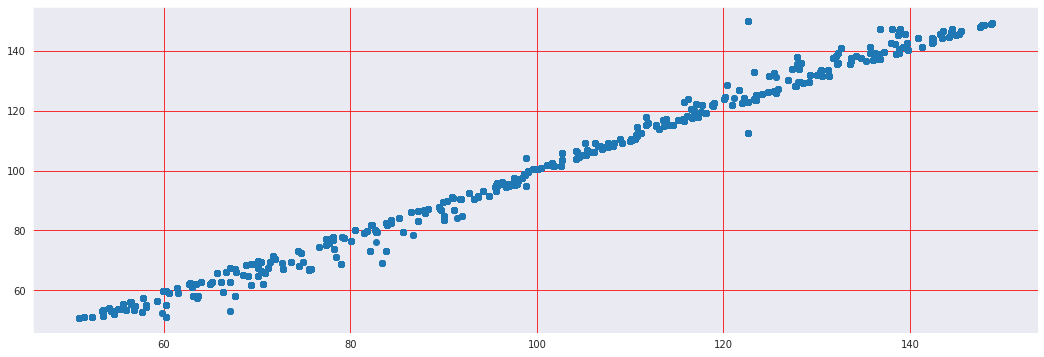

In [248]:
plt.figure(figsize=(18,6))
plt.scatter(y_pred, y_test)
plt.show()

In [252]:
df_if = pd.read_csv('./Data/cos_predict.csv')
df_if = df_if[['store_type','store_state','store_city','promotion_name','media_type','cost']]
print(df_if.shape)
df_if.head()

(60428, 6)


,store_type,store_state,store_city,promotion_name,media_type,cost
0,Deluxe Supermarket,OR,Salem,Bag Stuffers,"Daily Paper, Radio",126.62
1,Deluxe Supermarket,OR,Salem,Cash Register Lottery,"Daily Paper, Radio",59.86
2,Deluxe Supermarket,OR,Salem,High Roller Savings,"Daily Paper, Radio",84.16
3,Deluxe Supermarket,OR,Salem,Cash Register Lottery,In-Store Coupon,95.78
4,Deluxe Supermarket,OR,Salem,Double Down Sale,Radio,50.79


In [254]:
df_if = pd.get_dummies(df_if, prefix=None,columns=['store_type'])
df_if = pd.get_dummies(df_if, prefix=None,columns=['store_state'])
df_if = pd.get_dummies(df_if, prefix=None,columns=['store_city'])
df_if = pd.get_dummies(df_if, prefix=None,columns=['promotion_name'])
df_if = pd.get_dummies(df_if, prefix=None,columns=['media_type'])

In [257]:
print(df_if.shape)
df_if.head()

(60428, 97)


,cost,store_type_Deluxe Supermarket,store_type_Gourmet Supermarket,store_type_Mid-Size Grocery,store_type_Small Grocery,store_type_Supermarket,store_state_BC,store_state_CA,store_state_DF,store_state_Guerrero,store_state_Jalisco,store_state_OR,store_state_Veracruz,store_state_WA,store_state_Yucatan,store_state_Zacatecas,store_city_Acapulco,store_city_Bellingham,store_city_Beverly Hills,store_city_Bremerton,store_city_Camacho,store_city_Guadalajara,store_city_Hidalgo,store_city_Los Angeles,store_city_Merida,store_city_Mexico City,store_city_Orizaba,store_city_Portland,store_city_Salem,store_city_San Francisco,store_city_Seattle,store_city_Spokane,store_city_Tacoma,store_city_Vancouver,store_city_Victoria,promotion_name_Bag Stuffers,promotion_name_Best Savings,promotion_name_Big Promo,promotion_name_Big Time Discounts,promotion_name_Big Time Savings,promotion_name_Bye Bye Baby,promotion_name_Cash Register Lottery,promotion_name_Coupon Spectacular,promotion_name_Dimes Off,promotion_name_Dollar Cutters,promotion_name_Dollar Days,promotion_name_Double Down Sale,promotion_name_Double Your Savings,promotion_name_Fantastic Discounts,promotion_name_Free For All,promotion_name_Go For It,promotion_name_Green Light Days,promotion_name_Green Light Special,promotion_name_High Roller Savings,promotion_name_I Cant Believe It Sale,promotion_name_Money Savers,promotion_name_Mystery Sale,promotion_name_One Day Sale,promotion_name_Pick Your Savings,promotion_name_Price Cutters,promotion_name_Price Destroyers,promotion_name_Price Savers,promotion_name_Price Slashers,promotion_name_Price Smashers,promotion_name_Price Winners,promotion_name_Sale Winners,promotion_name_Sales Days,promotion_name_Sales Galore,promotion_name_Save-It Sale,promotion_name_Saving Days,promotion_name_Savings Galore,promotion_name_Shelf Clearing Days,promotion_name_Shelf Emptiers,promotion_name_Super Duper Savers,promotion_name_Super Savers,promotion_name_Super Wallet Savers,promotion_name_Three for One,promotion_name_Tip Top Savings,promotion_name_Two Day Sale,promotion_name_Two for One,promotion_name_Unbeatable Price Savers,promotion_name_Wallet Savers,promotion_name_Weekend Markdown,promotion_name_You Save Days,media_type_Bulk Mail,media_type_Cash Register Handout,media_type_Daily Paper,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,126.62,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,59.86,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,84.16,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,95.78,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,50.79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [259]:
X = df_if.drop(['cost'], axis=1)
y = df_if['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train: ', X_train.shape)
#print('X_val  : ', X_val.shape)
print('X_test : ', X_test.shape)
print()
print('y_train: ', y_train.shape)
#print('y_val  : ', y_val.shape)
print('y_test : ', y_test.shape)

X_train:  (48342, 96)
X_test :  (12086, 96)

y_train:  (48342,)
y_test :  (12086,)


In [261]:
model = RandomForestRegressor(n_estimators=500,
                                    max_features='sqrt',
                                    max_depth=37,
                                    random_state=42)
dt1 = datetime.datetime.now()
print(dt1)
model.fit(X_train, y_train)
dt2 = datetime.datetime.now()
print(dt2)
print('Time taken to train : ', (dt2-dt1))

y_pred= model.predict(X_test)
performance(y_test, y_pred)

2023-03-16 19:02:26.571401
2023-03-16 19:02:52.363893
Time taken to train :  0:00:25.792492
MAE  :  2.107
RMSE :  3.347
MAPE :  0.023
R2   :  0.988


In [122]:
#Performance Metrics

In [38]:
#rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# {'bootstrap': True,
#  'ccp_alpha': 0.0,
#  'criterion': 'squared_error',
#  'max_depth': None,
#  'max_features': 1.0,
#  'max_leaf_nodes': None,
#  'max_samples': None,
#  'min_impurity_decrease': 0.0,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'n_estimators': 100,
#  'n_jobs': None,
#  'oob_score': False,
#  'random_state': 42,
#  'verbose': 0,
#  'warm_start': False}
# MAE  :  0.052
# RMSE :  0.777
# MAPE :  0.0
# R2   :  0.999
#---------------------------------------
# Tune1_CV_rfr
# Best Params :  {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}
# Best Score  :  0.2836687384522831
#---------------------------------------
# Tune2_CV_rfr
# Best Params :  {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
# Best Score  :  0.5285643714198018
#---------------------------------------
# Tune3_CV_rfr
# Best Params :  {'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
# Best Score  :  0.7238236920250244
#---------------------------------------
# Tune4_CV_rfr
# Best Params :  {'max_depth': 22, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
# Best Score  :  0.8524154352766298
#---------------------------------------
#Tune5_CV_rfr
# Best Params :  {'max_depth': 27, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
# Best Score  :  0.924993995441682
#---------------------------------------
# Tune6_CV_rfr
# Best Params :  {'max_depth': 32, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
# Best Score  :  0.9580197645194382
#---------------------------------------
# Tune7_CV_rfr
# Best Params :  {'max_depth': 37, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 42}
# Best Score  :  0.9719205347790275
#---------------------------------------